# SVM

## Model: 
$$ y=sign(w\cdot x+b)$$

## Strategy: Margin maximization

### 原始问题

点到函数的距离：
$$
l=\frac{y(w\cdot x+b)}{||w||}
$$

最大最小距离（间隔）：
$$
\max_{w,b} \min_i \frac{y(w\cdot x_i+b)}{||w||} \newline
s.t. y_i (w\cdot x_i +b)\geq 0
$$

定义以下变量：
$$
\lambda = \min_i {y(w\cdot x_i+b)}
$$

带入问题，得到：
$$
\max_{w,b} \frac{\lambda}{||w||} \newline
s.t. y_i (w\cdot x_i +b)\geq \lambda
$$

做一下替换 $w \leftarrow \frac{w}{\lambda}\ \ b \leftarrow \frac{b}{\lambda}$ 得到
$$
\max_{w,b} \frac{1}{||w||} \newline
s.t. y_i (w\cdot x_i +b)\geq 1
$$

转换为最小值问题：
$$
\min_{w,b} \ \frac {1}{2}||w||^2\newline
s.t. \ \ y_i (w\cdot x_i +b)\geq 1
$$

### 对偶问题

构造拉格朗日函数

$$
L(w,b,a)=\frac {1}{2}||w||^2+\sum_{i=1}^N{a_i[1-y_i (w\cdot x_i +b)]}\quad a_i>0
$$

根据拉格朗日对偶性，将最小最大问题转化为最大最小问题

$$
\max_{a\geq0}L(w,b,a)=
\begin{cases}
\frac {1}{2}||w||^2 & \text{$w,b$ 满足约束}\newline
+\infty &\text{$w,b$ 不满足约束}
\end{cases}
$$


$$
{w,b}=arg\min_{w,b}\max_{a\geq0}L(w,b,a)=arg\max_{a\geq0}\min_{w,b}L(w,b,a)
$$

$L(w,b,a)$分别对${w,b}$求导

$$
\nabla_w {L(w,b,a)}=w-\sum_{i=0}^N{a_iy_ix_i}=0\newline
\nabla_b {L(w,b,a)}=-\sum_{i=0}^N{a_iy_i}=0
$$

得
$$
w=\sum_{i=0}^N{a_iy_ix_i}\newline
\sum_{i=0}^N{a_iy_i}=0
$$

带回$L(w,b,a)$，得
$$
\min_{w,b} {L(w,b,a)}=-\frac 12 \sum_{i=0}^N \sum_{j=0}^N a_i a_j y_i y_j( x_i\cdot x_j )+\sum_{i=0}^N a_i
$$

即得原问题的对偶问题
$$
\min_{a}\quad \frac 12 \sum_{i=0}^N \sum_{j=0}^N a_i a_j y_i y_j( x_i\cdot x_j )-\sum_{i=0}^N a_i\newline
s.t.\quad \sum_{i=0}^N{a_iy_i}=0\newline
a_i\geq0
$$

必有两个以上$a_j>0$，即支持向量，原问题最优解如下
$$
w^*=\sum_{i=0}^N{a_i^*y_ix_i}
$$

将上式代入 $y_j(w^*\cdot x_j+b^*)=1$

$$
\begin{aligned}
b^* &= y_i - w^*\cdot x_j \newline
&= y_j-\sum_{i=0}^N{a_i^*y_i(x_i\cdot x_j)}
\end{aligned}
$$

## Algorithm: 带约束的线性优化器

## 实现

In [1]:
import numpy as np
import matplotlib.pyplot as plt

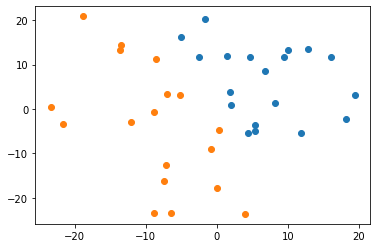

In [2]:
# 制作数据集
x = np.random.randn(40,2) * 10
x = x[(x[:, 0] * 2 + x[:, 1] < -3) | (x[:, 0] * 2 + x[:, 1] > 3), :]
y = ((x[:, 0] * 2 + x[:, 1]) >= 0)*2-1
y = y.reshape(-1,1)
N = len(y)

fig = plt.figure()
plt.scatter(x[y.reshape(-1) == 1, 0], x[y.reshape(-1) == 1, 1])
plt.scatter(x[y.reshape(-1) == -1, 0], x[y.reshape(-1) == -1, 1]);

In [3]:
from scipy.optimize import minimize  # 导入最小化算法

def fun(a):  # 目标函数
    # 莫名其妙 minimize 传进参数会被拉成一维向量
    temp = a.reshape(-1,1) * y * x  # N*n
    return 0.5 * (np.dot(temp, temp.T)).sum() - a.sum()

# 约束
cons = [{"type": "eq", "fun": lambda a: (a.reshape(-1, 1) * y).sum()}]  # sum(aiyi)==0
cons += [{"type": "ineq", "fun": lambda a, i=i: a[i]} for i in range(len(y))]  # ai>=0
# i=i 不可缺少

a0 = np.ones(y.shape)  # 设置初始值
res = minimize(fun, a0, method="SLSQP", constraints=cons)
print("最小值：", res.fun)
print("最优解：\n", res.x)
print("迭代终止是否成功：", res.success)
print("迭代终止原因：", res.message)

最小值： -0.16414765207839163
最优解：
 [ 7.15229100e-15  1.25279797e-14  1.94305755e-14  1.82130876e-14
  7.22195021e-15  3.10017365e-15 -1.02511334e-14 -1.27530384e-14
 -4.42652061e-16  1.33251839e-14  2.51214805e-15 -1.17762621e-14
  1.66675255e-14  1.11206519e-14  1.30671947e-16  1.41509648e-14
 -2.79898796e-14 -1.39004334e-16  6.96503287e-15  9.79829338e-14
  7.60175219e-15  8.26375836e-15  4.35026368e-15  1.64031845e-01
  1.95984399e-14  1.54590382e-14  1.95544916e-14  5.22216086e-15
  1.62938693e-02 -9.36122996e-15  4.14109129e-15  1.47737976e-01
  2.86557079e-15  1.28190397e-14  4.50252965e-15 -1.93787544e-14
 -4.70693640e-16]
迭代终止是否成功： True
迭代终止原因： Optimization terminated successfully


In [4]:
a = res.x
sv = np.where(abs(a) > 1e-2)[0]  # 支持向量
w = (a.reshape(-1, 1)*y*x).sum(axis=0)
b = y[sv[1]]-(a.reshape(N, 1)*y*np.dot(x, x[sv[1]].reshape(-1, 1))).sum()
print(f'支持向量为:{sv}')
print(f'w={w}')
print(f'b={b}')

支持向量为:[23 28 31]
w=[0.52522276 0.22797616]
b=[-0.05253254]


In [5]:
def defunc(x):
    return np.sign(np.inner(w, x) + b)

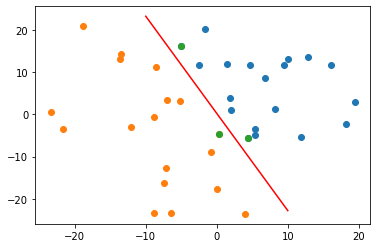

In [10]:
fig = plt.figure()
plt.scatter(x[y.reshape(-1) == 1, 0], x[y.reshape(-1) == 1, 1])
plt.scatter(x[y.reshape(-1) == -1, 0], x[y.reshape(-1) == -1, 1]);
plt.scatter(x[sv, 0], x[sv, 1]);
x1 = np.array([-10,10])
plt.plot(x1,(-w[0]*x1-b)/w[1], color='r');

原问题优化结果，和对偶问题优化结果相同

$$\displaylines{
{w,b}=arg\min_{w,b} \ \frac {1}{2}||w||^2\newline
s.t \ \ y_i (w\cdot x_i +b)\geq 1
}$$

In [7]:
def fun_o(wb): return 0.5*np.inner(wb[:-1], wb[:-1])


# 约束
cons_o = [{'type': 'ineq', 'fun':
           lambda wb, i=i: y[i]*(np.inner(wb[:-1], x[i])+wb[-1])-1}
          for i in range(N)]

wb0 = np.array([2.1,1,0.1]) # 设置初始值
res = minimize(fun_o, wb0, method='SLSQP', constraints=cons_o,)
print('最小值：', res.fun)
print('最优解：\n', res.x)
print('迭代终止是否成功：', res.success)
print('迭代终止原因：', res.message)

最小值： 0.16414773581050743
最优解：
 [ 0.52561844  0.22808053 -0.05223059]
迭代终止是否成功： True
迭代终止原因： Optimization terminated successfully


## SVM 线性不可分

原问题加入松弛条件：
$$
\min_{w,b} \ \frac {1}{2}||w||^2+C\sum_{i=1}^N \xi_i \newline
s.t. \ \ y_i (w\cdot x_i +b)\geq 1-\xi_i
$$

对偶问题：
$$
\min_{a}\quad \frac 12 \sum_{i=0}^N \sum_{j=0}^N a_i a_j y_i y_j( x_i\cdot x_j )-\sum_{i=0}^N a_i\newline
s.t.\quad \sum_{i=0}^N{a_iy_i}=0\newline
C\geq a_i\geq0
$$


In [ ]:
from scipy.optimize import minimize  # 导入最小化算法

def fun(a):  # 目标函数
    # 莫名其妙 minimize 传进参数会被拉成一维向量
    temp = a.reshape(-1,1) * y * x  # N*n
    return 0.5 * (np.dot(temp, temp.T)).sum() - a.sum()

# 约束
cons = [{"type": "eq", "fun": lambda a: (a.reshape(-1, 1) * y).sum()}]  # sum(aiyi)==0
cons += [{"type": "ineq", "fun": lambda a, i=i: a[i]} for i in range(len(y))]  # ai>=0
# i=i 不可缺少

a0 = np.ones(y.shape)  # 设置初始值
res = minimize(fun, a0, method="SLSQP", constraints=cons)
print("最小值：", res.fun)
print("最优解：\n", res.x)
print("迭代终止是否成功：", res.success)
print("迭代终止原因：", res.message)

## Kernel SVM

$$
\min_{a}\quad \frac 12 \sum_{i=0}^N \sum_{j=0}^N a_i a_j y_i y_j( x_i\cdot x_j )-\sum_{i=0}^N a_i\newline
s.t.\quad \sum_{i=0}^N{a_iy_i}=0\newline
C\geq a_i\geq0
$$

将对偶形式中的点积替换为核函数

$$
\min_{a}\quad \frac 12 \sum_{i=0}^N \sum_{j=0}^N a_i a_j y_i y_j k (x_i,x_j)-\sum_{i=0}^N a_i\newline
s.t.\quad \sum_{i=0}^N{a_iy_i}=0\newline
C\geq a_i\geq0
$$

In [20]:
from scipy.spatial.distance import pdist, squareform
from sklearn import datasets

In [87]:
x, y = datasets.make_moons(n_samples=200, noise=0.05)
y = y * 2 - 1

In [88]:
# 高斯核
def GaussKernel(delta=1):
    def GaussKernelF(x, y):
        return np.exp(-((x-y)**2).sum()/(2*delta**2))
    return GaussKernelF

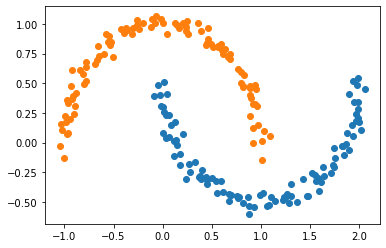

In [89]:
plt.scatter(x[y.reshape(-1) == 1, 0], x[y.reshape(-1) == 1, 1])
plt.scatter(x[y.reshape(-1) == -1, 0], x[y.reshape(-1) == -1, 1]);

In [90]:
delta = 1
C = 1
y = y.reshape(-1, 1)


def fun(a,kernel = GaussKernel(delta)):  # 目标函数
    # 高斯核，依然没有合适的向量化方法
    temp = a.reshape(-1, 1) * y * x  # N*n
    # dist = squareform(pdist(temp, lambda x, y: ((x - y) ** 2).sum()))
    # return 0.5*np.exp(-dist / delta ** 2).sum() - a.sum()
    K = np.ndarray((len(temp), len(temp)))
    for i in range(len(temp)):
        for j in range(len(temp)):
            K[i,j] = kernel(temp[i],temp[j])
    return 0.5*K.sum()-a.sum()


# 约束
cons = [{"type": "eq", "fun": lambda a: (a.reshape(-1, 1) * y).sum()}]  # sum(aiyi)==0
cons += [{"type": "ineq", "fun": lambda a, i=i: a[i]} for i in range(len(y))]  # ai>=0
cons += [{"type": "ineq", "fun": lambda a, i=i: C-a[i]} for i in range(len(y))]  # ai<=C

a0 = np.ones(y.shape)  # 设置初始值
res = minimize(fun, a0, constraints=cons)
print("最小值：", res.fun)
print("最优解：\n", res.x)
print("迭代终止是否成功：", res.success)
print("迭代终止原因：", res.message)
# 目前 Bug
# 1. 数据一多，求解失败
# 2. 咋全都是支持向量

最小值： 10600.222912989911
最优解：
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1.]
迭代终止是否成功： True
迭代终止原因： Optimization terminated successfully


SKlearn 中的 SVM 方法

In [92]:
from sklearn import svm
clf = svm.SVC(kernel='rbf', gamma=1, tol=1e-5)
clf.fit(x, y.reshape(-1))

SVC(gamma=1, tol=1e-05)

In [93]:
print('支持向量为：', clf.support_)
print('b=', clf.intercept_)
print('yi*ai=', clf.dual_coef_)
print('测试准确率：', clf.score(x, y))

支持向量为： [ 16  28  29  39  64  75  80  83 123 139 143 157 181 194 195 199   4   9
  10  17  23  26  44  70  77  87  93 144 149 172 183 191]
b= [0.02658741]
yi*ai= [[-0.7358236  -1.         -1.         -1.         -1.         -0.26478064
  -1.         -1.         -1.         -1.         -0.98248878 -0.00790241
  -1.         -1.         -0.80599127 -1.          0.38482754  1.
   1.          1.          0.81340805  1.          0.50462463  1.
   1.          1.          1.          1.          1.          0.09412649
   1.          1.        ]]
测试准确率： 1.0
